Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8978 - loss: 0.3338 - val_accuracy: 0.9844 - val_loss: 0.0491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9845 - loss: 0.0493 - val_accuracy: 0.9871 - val_loss: 0.0393
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9846 - val_loss: 0.0459
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9907 - val_loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9947 - loss: 0.0179 - val_accuracy: 0.9913 - val_loss: 0.0278
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0352
Test accuracy: 0.9913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/tmp/ipython-input-4166413563.py:70: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipython-input-4166413563.py:73: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


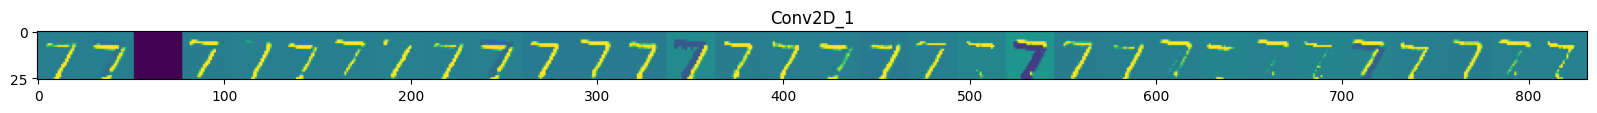

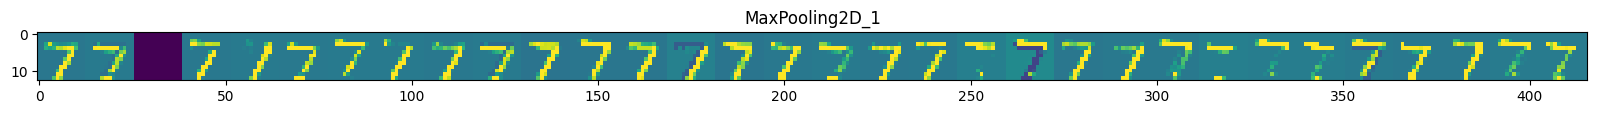

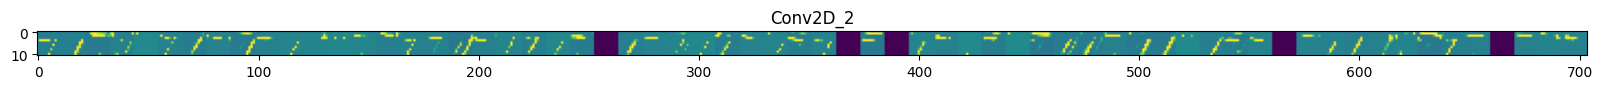

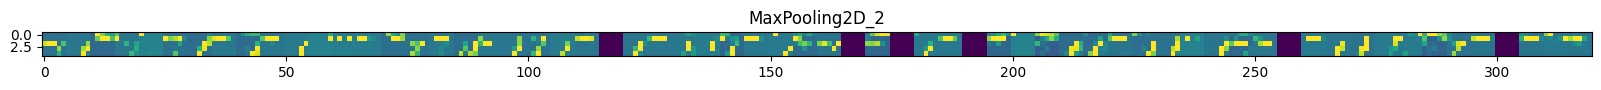

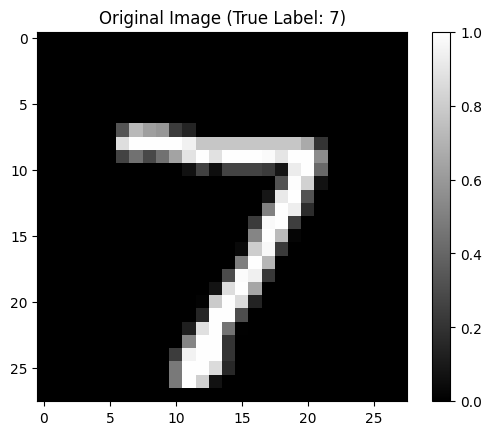

In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Build CNN model
model = models.Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling layer with 2x2 window
    layers.MaxPooling2D((2, 2)),
    # Second convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Second pooling layer
    layers.MaxPooling2D((2, 2)),
    # Flatten layer to transition to dense layers
    layers.Flatten(),
    # Dense layer with 64 units
    layers.Dense(64, activation='relu'),
    # Output layer with 10 units (for digits 0-9)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Create a model for feature extraction using the first layer's input
layer_outputs = [layer.output for layer in model.layers[:4]]  # First 4 layers (2 conv + 2 pooling)
feature_map_model = models.Model(inputs=model.layers[0].input, outputs=layer_outputs)

# Get feature maps for a test image
sample_image = test_images[0].reshape(1, 28, 28, 1)
feature_maps = feature_map_model.predict(sample_image)

# Visualize feature maps
layer_names = ['Conv2D_1', 'MaxPooling2D_1', 'Conv2D_2', 'MaxPooling2D_2']

for layer_name, feature_map in zip(layer_names, feature_maps):
    # Number of features in the feature map
    n_features = feature_map.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # We'll tile the activation channels in this matrix
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
        # Post-process the feature to make it visually palatable
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')

        # Tile each filter into this big horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

# Visualize original test image
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Original Image (True Label: {test_labels[0]})")
plt.colorbar()
plt.grid(False)
plt.show()

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.8907 - loss: 0.3493 - val_accuracy: 0.9821 - val_loss: 0.0524
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9857 - loss: 0.0454 - val_accuracy: 0.9889 - val_loss: 0.0351
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9906 - val_loss: 0.0321
✅ Test Accuracy: 0.9905999898910522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


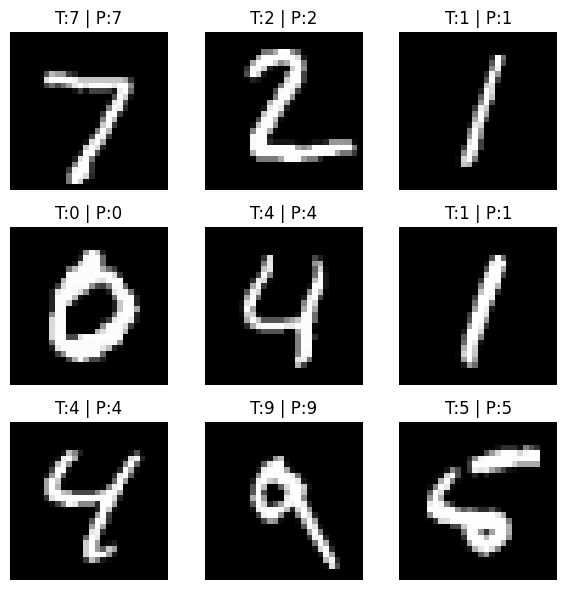

In [9]:
# Experiment 7: CNN – MNIST Classification with Prediction Visualization

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt

# -------------------------
# 1. Load and preprocess data
# -------------------------
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape to (28,28,1) and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# -------------------------
# 2. Build CNN Model (Functional API)
# -------------------------
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

# -------------------------
# 3. Compile and Train
# -------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=3,       # increase to 5 for better accuracy
                    validation_data=(test_images, test_labels),
                    verbose=1)

# -------------------------
# 4. Evaluate Model
# -------------------------
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print("✅ Test Accuracy:", test_acc)

# -------------------------
# 5. Prediction Visualization (like your image)
# -------------------------

# Take first 9 test images
sample_images = test_images[:9]
sample_labels = test_labels[:9]

# Get predictions
pred_probs = model.predict(sample_images)
pred_labels = pred_probs.argmax(axis=1)

# Plot
fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(sample_images[i].reshape(28,28), cmap="gray")
    ax.set_title(f"T:{sample_labels[i]} | P:{pred_labels[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()
